# For rent

This project is about building a model of housing prices for rent in Brazil. The model will be fed to a website that will determine housing prices under new variables, such as city and number of rooms. This system will determine whether it is worth investing in a given area or not.

This is a typical supervised learning task and a multiple regression problem, since we are given labeled training examples and the system will use multiple features to make a prediction. It is also a univariae regression problem, since we are only trying to predict a single value for each entity.

## Get the data

The dataset is from a kaggle competition available at https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

The zip file comes with two csv files. We are going to use the file `houses_to_rent_v2.csv` which is the latest dataset version

In [91]:
# TODO: download data from kaggle using kaggle API

import os
from zipfile import ZipFile
import urllib.request

DOWNLOAD_ROOT = "https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/download"
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url=DOWNLOAD_ROOT, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    zip_path = os.path.join(housing_path, "housing.zip")
    urllib.request.urlretrieve(housing_url, zip_path)
    
    #with ZipFile(zip_path, 'r') as zipObj:
    #    zipObj.extractall(housing_path)

In [92]:
#fetch_housing_data()

In [93]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing/houses_to_rent_v2.csv")
    return pd.read_csv(csv_path)

In [94]:
housing = load_housing_data()
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [95]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Each row represents one house. There are 10,692 instances in the dataset and 13 attibutes (city, area, rooms, bathroom, parking spaces, floor, animal, furniture, hoa, rent amount, property tax, fire insurance, total). It is important to notice that there are no attribute missing values.

**Attributes meanings:**
* city - Property location
* area - Property area
* rooms - Number of rooms
* bathroom - Number of bathrooms
* parking spaces - Number of parking spaces
* floor - Floor
* animal - Accept animals?
* furniture - Furniture?
* hoa (R\$) - Homeowners association tax
* rent amount (R\$) - Rent amount
* property tax (R\$) - Property tax
* fire insurance (R\$) - Fire insurance
* total (R\$) - Total

There are some categorical attributes, let's take a look at them

In [96]:
housing["city"].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

The dataset features 5 cities

In [97]:
housing["animal"].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

Most of the houses accept animals

In [98]:
housing["furniture"].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

And most of the house don't have furniture

Now, let's look at the other fields

If we look close to `floor` attribute we can see that there are some non-numerical values (`"-"`). We're going to truncate them to zero, since they represent houses not apartments.

In [99]:
housing["floor"] = housing["floor"].replace(['-'], 0)
housing = housing.astype({"floor": int})

In [100]:
housing.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


And now plot a histogram of all dataset

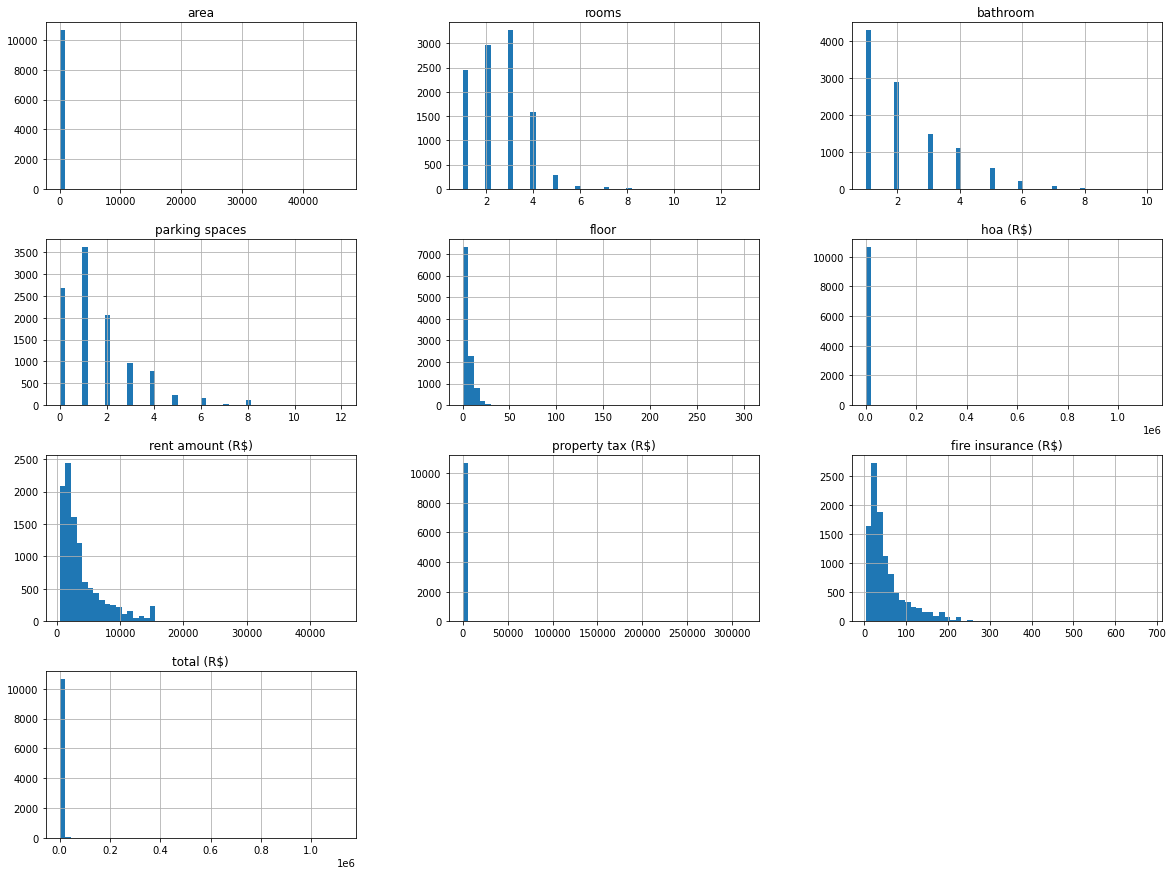

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Some insights:
* `area`, `hoa`, `property tax` and `total` histograms are a bit strange, that's probably bacause of outliers values
* These attributes have very different scales
* Many histograms are tail-heavy, they extend much farther to the right of the median than to the left

Let's remove outliers

q1: 2061.75
q3: 6768.0
I: 4706.25
maximum: 13827.375
manimum: -4997.625


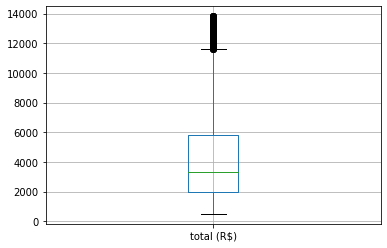

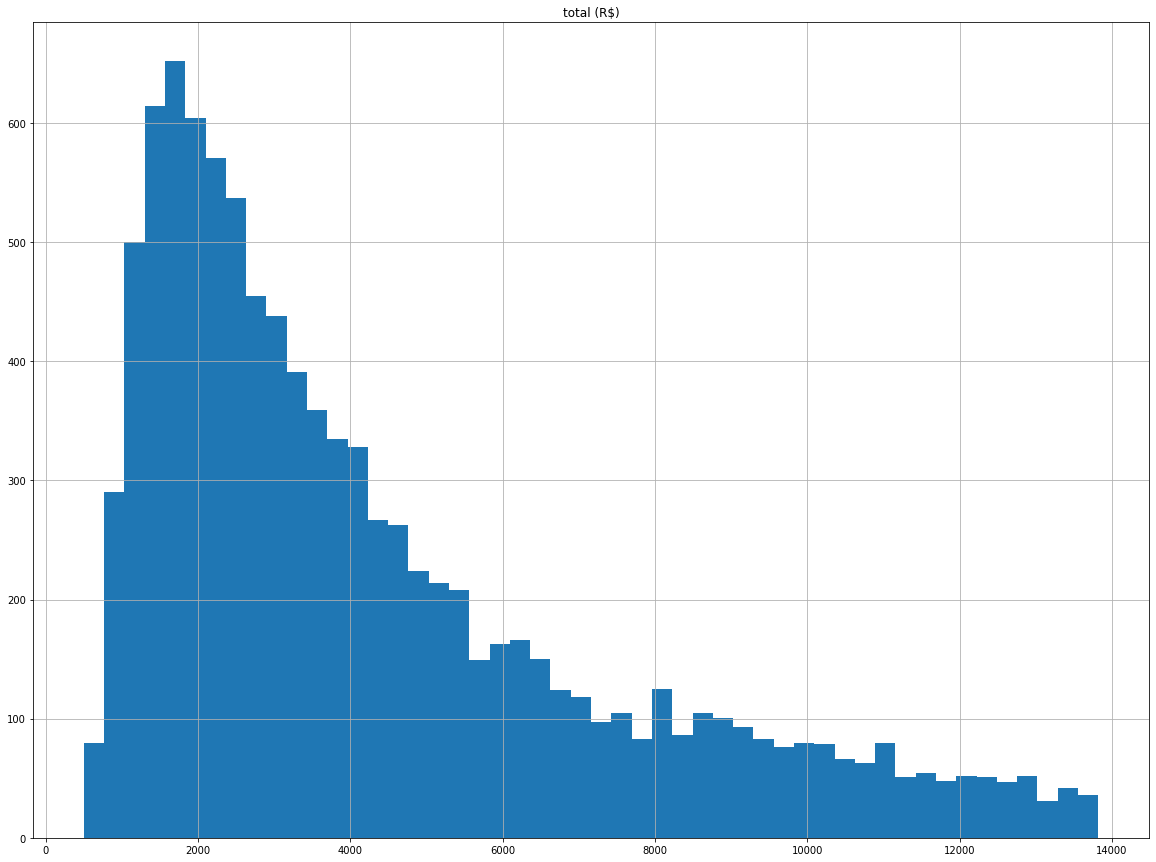

In [102]:
housing_with_outliers = housing

q1 = housing["total (R$)"].quantile(0.25)
q3 = housing["total (R$)"].quantile(0.75)
I = q3 - q1
maxi = q3 + 1.5*I
mini = q1 - 1.5*I

print("q1:", q1)
print("q3:", q3)
print("I:", I)
print("maximum:", maxi)
print("manimum:", mini)

housing = housing.loc[housing["total (R$)"] < maxi]
housing = housing.loc[housing["total (R$)"] > mini]

boxplot = housing.boxplot(column=["total (R$)"])
boxplot.plot()

housing.hist("total (R$)", bins=50, figsize=(20, 15))
plt.show()

We can take a new look at the data again

In [103]:
print("Before outlier removal:", housing_with_outliers.shape)
print("After outlier removal:", housing.shape)
housing.describe()

Before outlier removal: (10692, 13)
After outlier removal: (9986, 13)


,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,131.632886,2.416984,2.086521,1.463048,4.943721,781.852594,3263.652814,249.636191,44.745844,4340.064791
std,492.747146,1.130170,1.282416,1.468851,5.986953,861.013369,2399.668435,388.469128,34.239568,3078.240405
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,55.000000,2.000000,1.000000,0.000000,1.000000,160.000000,1500.000000,34.000000,20.000000,1990.000000
50%,85.000000,2.000000,2.000000,1.000000,3.000000,530.000000,2500.000000,110.000000,33.000000,3330.000000
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1100.000000,4250.000000,300.000000,58.000000,5845.750000
max,46335.000000,10.000000,10.000000,12.000000,301.000000,8000.000000,13500.000000,5404.000000,214.000000,13820.000000


It is important to notice that `area` has a max value much greater than its quartiles, but outliers were only removed in relation to `total (R$)` attributes

## Create a test set

We're creating a test set at this stage to avoid our personal bias when selecting a machine learning model. So, we're going to put aside the test set and just work the analysis with the train set.

To guarantee that the test set is representative of the overall population of the dataset we're going to do stratified sampling based on city attribute. The test set will contain 20% of the dataset instances.

The first thing we need to do is convert each city to a numerical value

In [104]:
cleanup_nums = {
    "city": {
        "São Paulo": 1,
        "Rio de Janeiro": 2,
        "Belo Horizonte": 3,
        "Porto Alegre": 4,
        "Campinas": 5
    }
}

In [105]:
housing = housing.replace(cleanup_nums)
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,1,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,1,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,4,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,4,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,1,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["city"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [107]:
strat_train_set["city"].value_counts() / len(strat_train_set)

1    0.534677
2    0.144342
3    0.118678
4    0.117927
5    0.084377
Name: city, dtype: float64

In [108]:
housing["city"].value_counts() / len(housing["city"])

1    0.534649
2    0.144402
3    0.118666
4    0.117965
5    0.084318
Name: city, dtype: float64

As we can see, `strat_train_set` has an overall proportion of the dataset 

## Looking for correlations

Let's put the test set aside and start working with the train set

In [109]:
housing = strat_train_set.copy()

In [110]:
corr_matrix = housing.corr()

In [111]:
corr_matrix["total (R$)"].sort_values(ascending=False)

total (R$)             1.000000
rent amount (R$)       0.947530
fire insurance (R$)    0.906463
bathroom               0.676758
property tax (R$)      0.655009
hoa (R$)               0.613025
rooms                  0.547825
parking spaces         0.546928
area                   0.146904
floor                  0.129306
city                  -0.284177
Name: total (R$), dtype: float64

As we can see from the correlation matrix above, `rent amount (R$)` and `fire insurance (R$)` have a strong positive correlation with the `total (R$)` attribute. Then, `total (R$)` value tends to go up when `rent amount (R$)` or `fire insurance (R$)` goes up. `city` attribute does not help to get any insight here because is a categorical attributes.

So, all attributes have some positive correlation with `total (R$)`

We can also plot some correlations between the attributes

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='rooms', ylabel='area'>,
        <AxesSubplot:xlabel='bathroom', ylabel='area'>,
        <AxesSubplot:xlabel='parking spaces', ylabel='area'>,
        <AxesSubplot:xlabel='hoa (R$)', ylabel='area'>,
        <AxesSubplot:xlabel='floor', ylabel='area'>,
        <AxesSubplot:xlabel='rent amount (R$)', ylabel='area'>,
        <AxesSubplot:xlabel='property tax (R$)', ylabel='area'>,
        <AxesSubplot:xlabel='fire insurance (R$)', ylabel='area'>,
        <AxesSubplot:xlabel='total (R$)', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='bathroom', ylabel='rooms'>,
        <AxesSubplot:xlabel='parking spaces', ylabel='rooms'>,
        <AxesSubplot:xlabel='hoa (R$)', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='rent amount (R$)', ylabel='rooms'>,
        <A

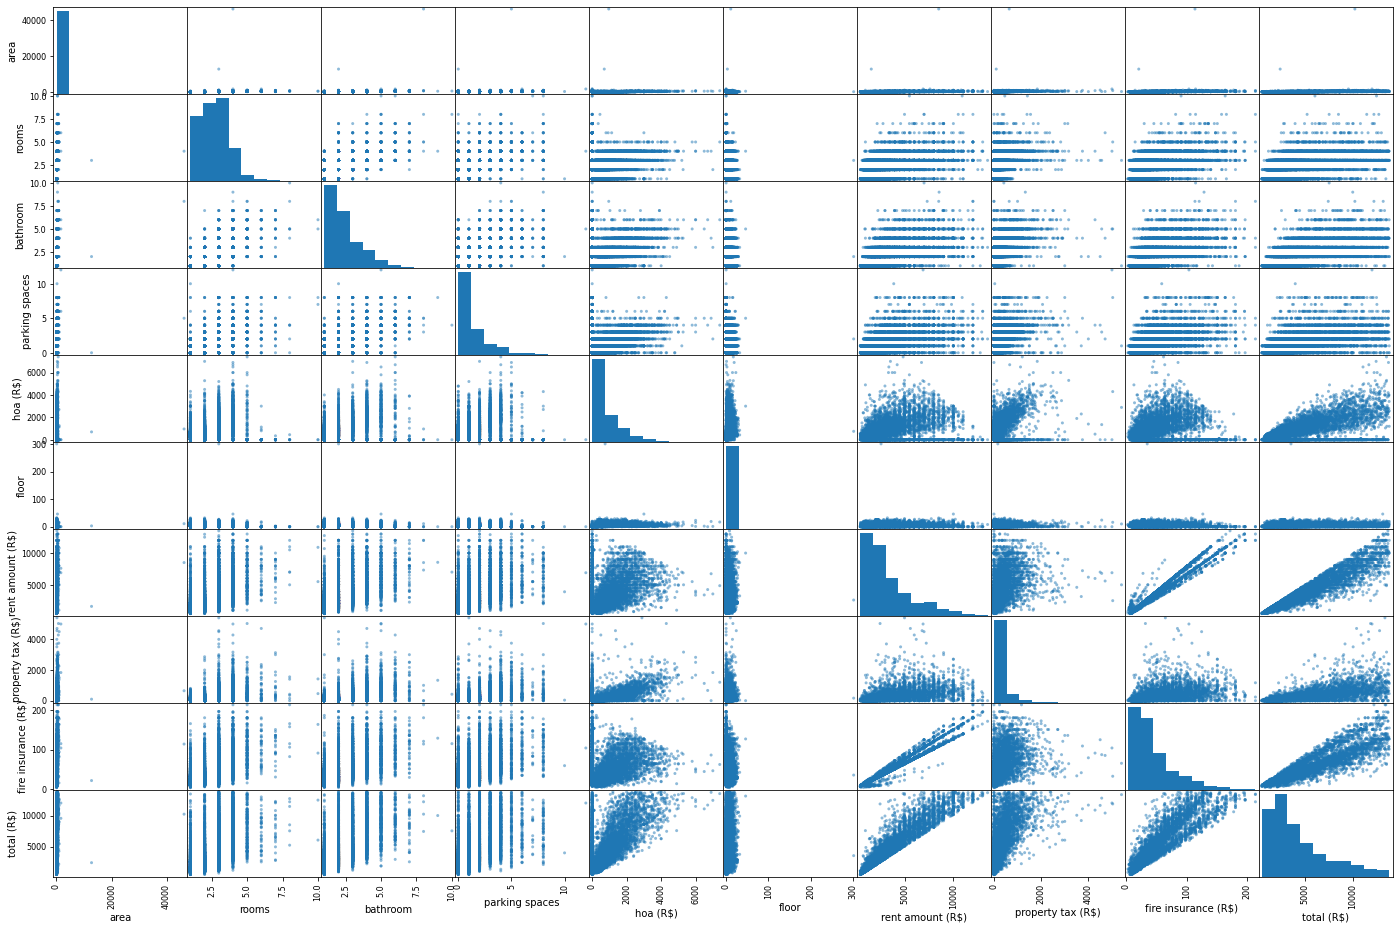

In [112]:
from pandas.plotting import scatter_matrix

attributes = ["area", "rooms", "bathroom", "parking spaces", "hoa (R$)", "floor",
              "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"]
scatter_matrix(housing[attributes], figsize=(24, 16))

The most promising attribute to predict `total (R$)` is `rent amount (R$)`, so let's zoom in on the correlation scatterplot

(0.0, 14000.0, 0.0, 14000.0)

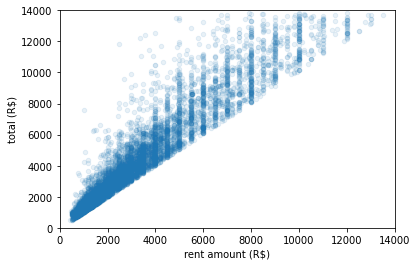

In [113]:
housing.plot(kind="scatter", x="rent amount (R$)", y="total (R$)", alpha=0.1)
plt.axis([0, 14000, 0, 14000])

Indeed, this plot reveals a very strong correlation between those attributes. There's an upward trend and the points are not too dispersed. We can also see some vertical straight lines that indicates a fixed rent amount that is summed to other attributes to result in different total values 

## Prepare the data for machine learning algorithms

Let's separate the predictors and the labels

In [118]:
housing = strat_train_set.drop("total (R$)", axis=1)
housing_labels = strat_train_set["total (R$)"].copy()

We're going to create a transformation pipeline to do feature scaling for numerical attributes using standardization. And also apply one hot encoder to categorical attributes, so that we create one binary attribute per category.

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ["area", "rooms", "bathroom", "parking spaces", "hoa (R$)", "floor",
              "rent amount (R$)", "property tax (R$)", "fire insurance (R$)"]
cat_attribs = ["city", "animal", "furniture"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

## Training models and evaluating on the training set

### Linear Regression

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_test = full_pipeline.fit_transform(strat_test_set.drop("total (R$)", axis=1))
housing_test_labels = strat_test_set["total (R$)"].copy()

Let's try this model on a few instances from the training set

In [139]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [8599.21226555 9898.21381332 2871.12874748 7869.31064039 1664.41323563]
Labels: [8599, 9898, 2871, 7869, 1664]


For an overall view the predictions are quite good!

Let's see the RMSE value

In [151]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: ", lin_rmse)

RMSE:  6.990890208547538


We can also evaluate our model using cross-validation

In [168]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores)

In [169]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_scores)

Scores: [14.03578938  0.87996528  0.89677751  0.82142228  0.86617267 12.54753507
  0.92559058  4.15941631 10.64986269  0.8854722 ]
Mean: 4.666800396340773
Standard deviation: 5.215538295600185


As we can see the score on validation set (4.66) is close to the score on training set

### Decision Tree

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [171]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE: ", tree_rmse)

RMSE:  0.0


That means the decision tree model has possibly badly overfit the data

Let's analyse it with cross-validation

In [172]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [236.41735386 237.12558261 271.45193671 279.0732271  250.0133238
 322.12293691 246.79402416 216.44125883 239.07286984 207.58826972]
Mean: 250.61007835318637
Standard deviation: 31.477448595617624


Indeed, the Decision Tree model is overfitting against the training set and performs worse than Linear Regression

### Random Forest Regressor

In [173]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [156]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE: ", forest_rmse)

RMSE:  60.29890407398617


In [167]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [136.02014866 167.0534141  171.64935013 172.19630451 192.67936705
 173.04169374 192.37223736 158.9176249  142.79371415 127.62789142]
Mean: 163.43517460135786
Standard deviation: 21.029518914159254


It turns out Linear Regression performs better than Random Forest

So, **Linear Regression** is the most **satisfatory model**

## Evaluating the model on the test set

In [184]:
final_model = lin_reg

X_test = strat_test_set.drop("total (R$)", axis=1)
y_test = strat_test_set["total (R$)"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE test set: ", final_rmse)

RMSE test set:  136.71285476801714


In [189]:
from sklearn.metrics import r2_score

print("R2:", r2_score(y_test, final_model.predict(X_test_prepared)))

R2: 0.9979690533422748


Even though, the RMSE on test set is greater than RMSE on train set, the R2 value represents a good performance

## Save the model

In [198]:
import joblib

model_path = "model/"

if not os.path.isdir(model_path):
    os.makedirs(model_path)

joblib.dump(final_model, model_path+"model.joblib")

['model/model.joblib']